In [2]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
mort_df=pd.read_csv('C://Users//Rachel//Downloads//example.csv') # Read csv file into a useable dataframe
mort_df.shape                          # Display shape of array to see how many rows and columns are in the dataframe

(32370, 22)

In [4]:
mort_df.head()

,Dataflow,Geographic Area,Indicator,Sex,Time Period,Observation Value,Unit Multiplier,Unit of Measure,Observation Status,Observation Confidentaility,...,Weighted Sample Size,Observation Footnote,Series Footnote,Data Source,Citation of or link to the data source,Custodian,Time period activity related to when the data are collected,Reference Period,The period of time for which data are provided,Current Age
0,Cross-sector Indicators,Middle East,Infant mortality rate,Female,1962-06,221.063578,NaN,Deaths per 1000 live births,Normal value,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
1,Cross-sector Indicators,Middle East,Infant mortality rate,Female,1963-06,217.464131,NaN,Deaths per 1000 live births,Normal value,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
2,Cross-sector Indicators,Middle East,Infant mortality rate,Female,1964-06,213.923579,NaN,Deaths per 1000 live births,Normal value,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
3,Cross-sector Indicators,Middle East,Infant mortality rate,Female,1965-06,210.421883,NaN,Deaths per 1000 live births,Normal value,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
4,Cross-sector Indicators,Middle East,Infant mortality rate,Female,1966-06,206.965458,NaN,Deaths per 1000 live births,Normal value,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total


In [5]:
mort_df.dtypes

Dataflow                                                        object
Geographic Area                                                 object
Indicator                                                       object
Sex                                                             object
Time Period                                                     object
Observation Value                                              float64
Unit Multiplier                                                float64
Unit of Measure                                                 object
Observation Status                                              object
Observation Confidentaility                                    float64
Lower Bound                                                    float64
Upper Bound                                                    float64
Weighted Sample Size                                           float64
Observation Footnote                                           float64
Series

In [6]:
min_mort_data_df = mort_df[['Geographic Area','Observation Value']]  # Create a new dataframe containing only the chosen data
min_mort_data_df.shape                                  # Display the shape of the dataframe as a quick check to ensure 
                                                          # dataframe has expected number of columns and rows

(32370, 2)

In [7]:
no_missing_values_df = min_mort_data_df.dropna(axis=0,how='any')  # Use dropna to remove rows with NaN in any column
no_missing_values_df.shape

(32370, 2)

In [8]:
#shows the number of data points for each geographic area
no_missing_values_df.groupby('Geographic Area')['Observation Value'].count()

Geographic Area
Africa             8834
Caribbean          1821
Central America    1449
East Asia           919
East Europe        3972
Middle East        3659
North America       620
Oceania            2672
South America      2197
South Asia         2821
West Europe        3406
Name: Observation Value, dtype: int64

Text(0, 0.5, 'Number of Data Points')

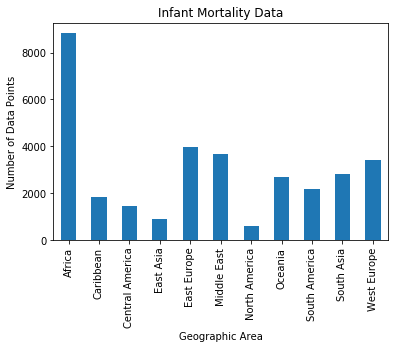

In [9]:
#graphs the data by the number of data points in each group
ax = no_missing_values_df.groupby('Geographic Area')['Observation Value'].count().plot(kind='bar', title='Infant Mortality Data')
ax.set_xlabel('Geographic Area')
ax.set_ylabel('Number of Data Points')

In [10]:
#show the mean value for each geographic area (same as graph above)
no_missing_values_df.groupby('Geographic Area')['Observation Value'].mean()

Geographic Area
Africa             94.624930
Caribbean          39.552372
Central America    48.652941
East Asia          35.513962
East Europe        24.017284
Middle East        58.065998
North America      28.136174
Oceania            41.955015
South America      49.708044
South Asia         64.408614
West Europe        11.684693
Name: Observation Value, dtype: float64

Text(0, 0.5, 'Mean Infant Mortality Rate')

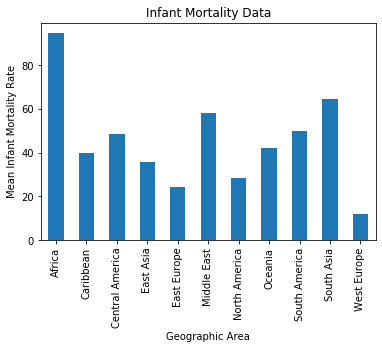

In [11]:
#this shows a graph of the mean infant mortality rate value for each geographic area
ax = no_missing_values_df.groupby('Geographic Area')['Observation Value'].mean().plot(kind='bar', title='Infant Mortality Data')
ax.set_xlabel('Geographic Area')
ax.set_ylabel('Mean Infant Mortality Rate')

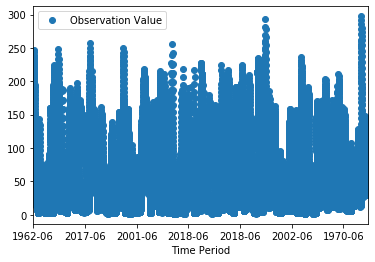

In [12]:
#here i attempted to see if a linear regression algorithim would work better over a time period, but it does not appear useful
mort_df.plot(x='Time Period',y='Observation Value',style='o')
plt.show()

In [13]:
#a dummy dataframe must be made as the values in geographic area section are non numeric
dummy_df = pd.get_dummies(no_missing_values_df['Geographic Area'])

In [14]:
X = dummy_df

In [15]:
y = no_missing_values_df['Observation Value'].values.reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=16)

In [17]:
X_train.shape

(22659, 11)

In [18]:
X_test.shape

(9711, 11)

In [19]:
regressor = LinearRegression()     # Create a scikit learn LinearRegression object
regressor.fit(X_train, y_train)    # Use the fit method to train the model using the data separated for training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#using the predicted y values to determine the accuracy by testing against the test x section
y_pred = regressor.predict(X_test)

In [21]:
#combine the two 1D numpy arrays into a 2D array
combined = np.hstack((y_test,y_pred))
#Convert the numpy 2D array into a pandas dataframe
accuracy_df = pd.DataFrame(combined,columns=['Actual','Predicted'])
accuracy_df.head

<bound method NDFrame.head of           Actual  Predicted
0       8.661897  23.757812
1      10.160981  23.757812
2     172.177185  93.859375
3      29.145273  42.101562
4       5.493653  23.757812
...          ...        ...
9706   26.857424  39.984375
9707    8.376086  49.515625
9708   82.371363  11.632812
9709   77.071458  93.859375
9710   27.768038  65.320312

[9711 rows x 2 columns]>

In [22]:
#The next three lines are to check the margin of error created by my project, this is explained in my debrief
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  29.54704699859747


In [23]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 39.68042531487791


In [24]:
print(regressor.coef_)
print(X_train.columns)

[[4.11514744e+13 4.11514744e+13 4.11514744e+13 4.11514744e+13
  4.11514744e+13 4.11514744e+13 4.11514744e+13 4.11514744e+13
  4.11514744e+13 4.11514744e+13 4.11514744e+13]]
Index(['Africa', 'Caribbean', 'Central America', 'East Asia', 'East Europe',
       'Middle East', 'North America', 'Oceania', 'South America',
       'South Asia', 'West Europe'],
      dtype='object')
